In [ ]:
!pip install otter-grader==1.1.6

from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/hw/hw08

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Homework 8: Linear Regression and Regression Inference

본 자료는 UC Berkeley의 Data 8의 HW10과 HW11을 통합하여 수정한 것입니다. (*This document is a combined version of HW10 and HW11 at Data 8 of UC Berkeley.*)

각 제공된 셀을 채워서 숙제를 완성하기 바랍니다. 항상 테스트할 때는 위의 셀들을 모두 실행하여 미리 제공된 테스트 데이터를 로드한 이후에 진행하기 바랍니다.

**도움이 되는 자료**:
- [Python Reference](http://data8.org/sp22/python-reference.html): Data 8에서 사용되는 배열과 테이블 메소드들의 요약자료!

**교재의 관련 자료**: 

* [The Regression Line](https://www.inferentialthinking.com/chapters/15/2/Regression_Line.html)
* [Method of Least Squares](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html)
* [Least Squares Regression](https://www.inferentialthinking.com/chapters/15/4/Least_Squares_Regression.html)
* [Using Confidence Intervals](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html)
* [Inference for Regression](https://www.inferentialthinking.com/chapters/16/Inference_for_Regression.html)

여러분은 모든 문제에 대해서는 적절한 위치에 설명과 답변을 제시해야 합니다. **본 숙제에서 제공되는 셀에서 정의한 변수들은 절때 값을 변경하면 안됩니다.** 예를 들어, `max_temperature`에 대한 값을 구해야 할 경우에, 해당 질문에 제대로 답을 구했더라도 추후에 이 변수를 수정하면 검사에서 틀린 것으로 체크될 것입니다.

**숙제 기한:**

이 숙제의 기한은 11월 29일(화) 밤 11시 59분까지입니다. 11월 26일(토) 밤 11시 59분 이전에 제출할 경우에는 5점의 가점이 부여됩니다. **기한이 지난 이후에는 받지 않습니다.**

**Note:** 이 숙제에는 숨어있는 검사가 있습니다. 이는 모든 검사에서 통과되었더라도 최종 점수가 100%라는 것을 의미하지 않는다는 것입니다. 여러분이 제출한 숙제에 대하여 정답인지를 확인하기 위해서 추가적인 데이터로 검사를 진행합니다.

여러분의 답을 다른 학생과 직접적으로 공유하는 것은 허용하지 않습니다. 다만, 조교와 혹은 다른 학생들과 문제에 대하여 논의하는 것은 장려합니다. 서로 협력한 부분에 대해서는 해당 부분에 꼭 명기를 하기 바랍니다.

모든 숙제는 최대한 빠른 시일내에 시작해야 문제가 봉착되었을 때 도움을 받을 수 있는 충분한 시간을 확보할 수 있을 것입니다. 모든 질의는 LMS 시스템의 문의 게시판을 이용하고 개인적인 이메일에는 대응하지 않습니다.

In [ ]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *
import d8error

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore')
from datetime import datetime

## 1. Triple Jump Distances vs. Vertical Jump Heights

특정 스포츠의 한 종목의 기술은 관련된 다른 종목의 기술에도 적용될까요? 그 답은 활동에 따라 다를 수 있습니다. [트리플 점프(세단뛰기; triple jump)](https://en.wikipedia.org/wiki/Triple_jump)와 [수직 점프(제자리 높이뛰기; vertical jump)](https://en.wikipedia.org/wiki/Vertical_jump)를 살펴보도록 합시다. 우리는 선형 회귀(linear regression)에 대해 배우고 있기 때문에 두 스포츠의 기술 수준 사이의 *선형*연관성을 찾을 것입니다.

40명의 대학축구선수들을 관찰하여 다음과 같은 자료를 수집하였습니다. 두 종목에서 각 선수의 거리는 센티미터로 측정되었습니다. 아래 셀을 실행하여 데이터를 읽어옵니다.

In [ ]:
# Run this cell to load the data
jumps = Table.read_table('triple_vertical.csv')
jumps

triple,vertical
383,33
781,71.1
561.62,62.25
624.52,61.33
446.24,40.19
515.3,38.96
449.22,39.69
560.91,46.51
519.12,37.68
595.38,53.48


<!-- BEGIN QUESTION -->

**Question 1.1.** 배열 `data`의 값을 표준 단위(standard units)로 변환하는 함수 `standard_units`을 완성하시오. **(5 Points)**

<!--
BEGIN QUESTION
name: q1_1
manual: true
-->

In [ ]:
def standard_units(data):
    ...

In [ ]:
grader.check("q1_1")

**Question 1.2.** 이제 `standard_units` 함수를 사용하여 `x`와 `y` 사이의 상관관계를 계산하는 함수 `correlation`을 완성합니다. **(5 points)**

<!--
BEGIN QUESTION
name: q1_2
manual: false
points:
 - 0
 - 5
-->

In [ ]:
def correlation(x, y):
    ...

In [ ]:
grader.check("q1_2")

<!-- BEGIN QUESTION -->

**Question 1.3.** 회귀분석(regression)을 실행하기 전에 데이터의 모양을 확인하는 것은 중요합니다. 왜냐하면 우리의 눈은 데이터의 비정상적인 패턴을 잘 알아채기 때문입니다. 수평 축의 트리플 점프 거리와 수직 축의 수직 점프 거리를 사용하여 산점도(scatter plot)을 **회귀선(regression line)과 함께** 그립니다. **(5 points)**

파이썬에서 회귀선을 자동으로 그리도록 하는 방법에 대한 지침은 [여기](http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html#datascience.tables.Table.scatter)에 있는 `scatter`의 설명서를 참조하기 바랍니다.

*Hint:* `fit_line` 인수는 여기서 유용할 것입니다.!

<!--
BEGIN QUESTION
name: q1_3
manual: true
image: true
-->

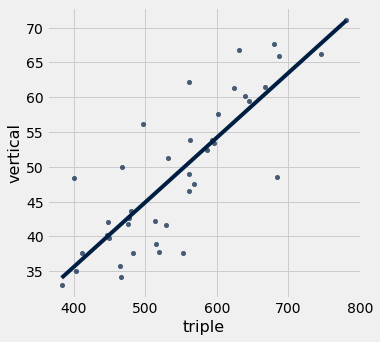

In [ ]:
...

**Question 1.4.** 상관 계수 $r$은 0, .5, -.5 중 어디에 가장 가까울까요? 설명하시오. **(5 points)**

<!--
BEGIN QUESTION
name: q1_4
manual: true
-->

_이 텍스트를 지우고 여러분의 답변을 이곳에 작성하시오._

<!-- END QUESTION -->

**Question 1.5.** 첫번재 열이 x축이고, 두번째 열이 y축인 두개의 열을 가진 테이블 `tbl`을 인수로 하는 함수 `parameter_estimates`를 생성합니다. 이 함수는 다음의 세 가지 요소를 가진 배열을 반환합니다: 입력된 테이블의 두 열에 대한 **(1) 상관 계수**, 원 단위에서 첫번째 열로부터 두번째 열을 예측하는 회귀선의 **(2) 기울기**와 **(3) 절편**. **(5 points)**

*Hint:* 이런 경우는 더물기는 하지만, 이번 문제는 어떤 테이블에서도 이 함수를 호출할 수 있도록 열 이름 대신 열 인덱스를 사용하여 함수를 구현합니다. 만약 열 인덱스를 사용하여 개별 열을 추출하는 방법에 대해 필요하다면 교재의 [여기](https://www.inferentialthinking.com/chapters/06/Tables.html#accessing-the-data-in-a-column)를 참조하기 바랍니다.

<!--
BEGIN QUESTION
name: q1_5
manual: false
points:
 - 0
 - 0
 - 0
 - 5
-->

In [ ]:
def parameter_estimates(tbl):
    ...
    return make_array(r, slope, intercept)

parameters = parameter_estimates(jumps) 
print('r:', parameters.item(0), '; slope:', parameters.item(1), '; intercept:', parameters.item(2))

In [ ]:
grader.check("q1_5")

**Question 1.6.** 이제 반대로 수직 점프 거리가 주어질때 트리플 점프 거리를 예측한다고 가정합니다. 이 선형 모형의 회귀 파라미터는 무엇입니까? **Question 1.5**의 트리플 점프 거리가 주어졌을 때 수직 점프 거리를 예측했던 모델의 회귀 파라미터와 어떻게 비교할 수 있을까요? **(5 points)**

`regression_changes`에 3개의 요소를 갖는 배열을 지정합니다. 각 요소는 $x$와 $y$에 대해 수직과 트리플을 교환하였을 때 `parameter_estimates`에 의해 반환되는 해당 요소가 변경되는지 아닌지를 나타냅니다. 예를 들어, 만약 $r$와 기울기는 값이 변경되었고, 절편은 변경되지 않았다면 `regression_changes`에는 `make_array(True, True, False)`가 할당될 것입니다.

<!--
BEGIN QUESTION
name: q1_6
manual: false
points:
 - 0
 - 0
 - 5
-->

In [ ]:
regression_changes = ...
regression_changes

In [ ]:
grader.check("q1_6")

**Question 1.7.** 트리플 점프 거리가 특정 선수의 수직 점프 높이를 예측하기 위해 **Question 1.5**에서 구한 `parameters`를 사용해봅시다. **(5 points)**

트리플 점프 세계 기록은 조나단 에드워즈가 세운 18.29 *미터*입니다. 에드워즈의 수직 점프의 예측 값은 무엇입니까?

*Hint:* 미터를 센티미터로 변환하는 것을 잊지 않도록 합니다!

<!--
BEGIN QUESTION
name: q1_7
manual: false
points:
 - 0
 - 5
-->

In [ ]:
triple_record_vert_est = ...
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

In [ ]:
grader.check("q1_7")

<!-- BEGIN QUESTION -->

**Question 1.8.** 에드워즈의 수직 점프를 예측하기 위해 이 직선을 사용하는 것이 타당하다고 생각하나요? **(5 points)**

*Hint:* `jumps`의 트리플 점프 거리와 에드워즈의 트리플 점프 거리를 비교하시오. **Question 1.3**에서 제시한 나머지 데이터와 비교적 유사한가요?

<!--
BEGIN QUESTION
name: q1_8
manual: true
-->

_이 텍스트를 지우고 여러분의 답변을 이곳에 작성하시오._

<!-- END QUESTION -->



## 2. Evaluating NBA Game Predictions

#### 스포츠 베팅에 대한 간략한 소개

농구 경기에서, 각 팀은 몇 점을 득점한다. 전통적으로 자신의 경기장에서 경기를 하는 팀을 "홈팀"(home team), 그 상대팀을 "원정팀"(away team)으로 불린다. 승자는 경기가 끝날 시점에 더 많은 점수를 얻은 팀이다.

우리는 경기에서 일어난 일을 **원정팀의 점수에서 홈팀의 점수를 뺀 점수 차이**로 정의되는 "**결과(outcome)**"로 요약할 수 있다.

$$\text{outcome} = \text{points scored by the away team} - \text{points scored by the home team}$$

만약 이 숫자가 양수이면 원정팀이 승리한 것이다. 만약 음수라면 홈팀이 이겼다.

게임에 베팅하기 위해 카지노의 분석가들은 게임의 결과를 예측하려고 노력한다. 이 결과의 예측을 **스프레드(spread)**라고 부릅니다.


In [ ]:
spreads = Table.read_table("spreads.csv")
spreads

Date,Home Team,Away Team,Home Points,Away Points,Outcome,Spread
4/10/2015,Utah,Memphis,88,89,1,2.5
3/10/2015,Utah,New York,87,82,-5,-13
11/19/2014,Indiana,Charlotte,88,86,-2,-2
11/15/2014,Chicago,Indiana,90,99,9,-9
3/25/2015,Utah,Portland,89,92,3,-2
3/3/2015,Memphis,Utah,82,93,11,-7
3/18/2015,Utah,Washington,84,88,4,-3
3/16/2015,Utah,Charlotte,94,66,-28,-4.5
1/24/2015,Charlotte,New York,76,71,-5,-9
11/7/2014,Oklahoma City,Memphis,89,91,2,7


다음은 결과(outcome)와 스프레드(spread)에 대한 산점도(scatter plot)입니다. 수평축은 스프레드를 표시하였습니다.

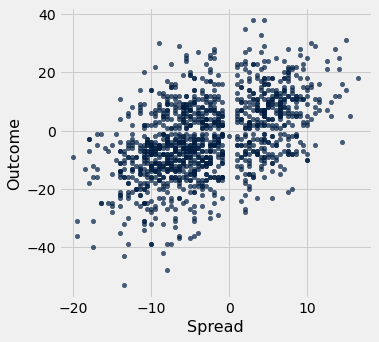

In [ ]:
spreads.scatter("Spread", "Outcome")

산점도(scatter plot)에서 스프레드와 결과는 스프레드가 0일때를 제외하고는 거의 0이 아님을 알 수 있습니다. 이는 농구 경기에서 무승부로 끝나지 않기 때문입니다. 한 팀이 이겨야 하며, 이로 인해 결과는 결코 0이 될 수 없습니다. 스프레드는 결과를 추정하기 위해 선택되었기 때문에 거의 0이 아닙니다.

카지노들이 경기 결과를 얼마나 잘 예측하고 있는지를 조사해봅시다.

우리가 물어볼 수 있는 한가지 질문은 카지노의 예측이 평균적으로 정확한가 입니다. 다른 말로는 스프레드의 모든 값에 대하여 스프레드가 할당된 게임의 평균 결과가 스프레드와 동일한가 입니다. 그렇지 않다면 카지노는 분명히 예측에 체계적인 오류를 범하고 있을 것입니다.

**Question 2.1.** 결과와 스프레드 사이의 상관계수를 계산합니다. **(5 points)**

*Note:* 이는 `correlation` 함수를 사용하는 것이 도움이 될 것입니다.

<!--
BEGIN QUESTION
name: q2_1
manual: false
points:
 - 0
 - 5
-->

In [ ]:
spread_r = ...
spread_r

In [ ]:
grader.check("q2_1")

**Question 2.2.** 스프레드가 3.5에서 6.5사이 (3.5와 6.5를 포함)인 게임에서 결과의 평균은 무엇입니까? **(5 points)**

<!--
BEGIN QUESTION
name: q2_2
manual: false
points:
 - 0
 - 5
-->

In [ ]:
spreads_around_5 = ...
spread_5_outcome_average = ...
print("Average outcome for spreads around 5:", spread_5_outcome_average)

In [ ]:
grader.check("q2_2")

**Question 2.3.** 원 단위(original units)의 스프레드로부터 결과를 예측하는 최소-제곱 선형 회귀선(the least-squares linear regression line)을 계산하기 위해 앞서 정의한 함수인 `parameter_estimates`를 사용합니다. 이 함수는 아래의 셀에서처럼 두 개의 열을 가진 테이블을 인자로 사용하며, 첫번째 열은 `Spread` (x)를, 두번째 열은 `Outcome` (y)를 나타냅니다. **(5 points)**

<!--
BEGIN QUESTION
name: q2_3
manual: false
points:
 - 0
 - 0
 - 2
 - 3
-->

In [ ]:
compute_tbl = spreads.select('Spread', 'Outcome')
estimates = ...
spread_slope = ...
spread_intercept = ...
print("Slope:", round(spread_slope, 3))
print("Intercept", round(spread_intercept, 3))

In [ ]:
grader.check("q2_3")

<!-- BEGIN QUESTION -->

**Question 2.4.** 스프레드에 대한 값에 무관하게 단순히 평균 결과를 예측하는 다른 모델을 만든다고 가정해봅시다. 이 새 모델은 최소 제곱 오차를 최소화합니까? 왜 그런가요? 혹은 왜 그렇지 않은가요? **(5 points)**

<!--
BEGIN QUESTION
name: q2_4
manual: true
-->

_이 텍스트를 지우고 여러분의 답변을 작성하시오._

<!-- END QUESTION -->



### 최소-제곱 회귀선 적합 (Fitting a Least-Squares Regression Line)

최소-제곱 회귀선은 가능한 모든 적합 직선 중에서 RMSE(Root Mean Square Error; 평균 제곱 오류의 근)을 최소화하는 유일한 직선입니다. 이 성질을 사용하여 RMSE를 최소화하는 기울기 및 절편 값의 쌍을 찾아 회귀선 방적식을 찾을 수 있습니다.

**Question 2.5.** `errors`라는 함수를 정의합니다. 이는 세 개의 인자를 필요로합니다:
1. `spreads` 같은 테이블 `tbl`(열의 이름과 의미는 같지만, 같은 데이터일 필요는 없음)
2. 직선의 `slope` (숫자)
3. 직선의 `intercept` (숫자).

이 함수는 해당 기울기와 절편을 가진 선을 사용하여 주어진 테이블에서 각 게임에 대한 스프레드로부터 결과를 예측할 때 발생하는 **오류 배열을 반환**해야 합니다. **(3 points)**

*Note*: RMSE가 아닌, 오류 배열을 반환해야 합니다.

<!--
BEGIN QUESTION
name: q2_5
manual: false
points:
 - 0
 - 0
 - 3
-->

In [ ]:
def errors(tbl, slope, intercept):
    ...

In [ ]:
grader.check("q2_5")

**Question 2.6.** 함수 `errors`를 사용하여 기울기가 `0.5`, 절편이 `25`인 직선에 대하여 `spreads` 데이터세트가 갖는 오차를 계산하시오. 그리고 그 오차에 대한 산점도(scatter plot)를 출력하시오. **(3 points)**

*Hint:* 오차에 대한 산점도를 만들려면 데이터세트에서 각 결과에 대한 오차를 표시해야 합니다. 실제의 스프레드를 가로축에 놓고, 결과 오차를 세로축에 둡니다.

<!--
BEGIN QUESTION
name: q2_6
manual: false
points:
 - 3
-->

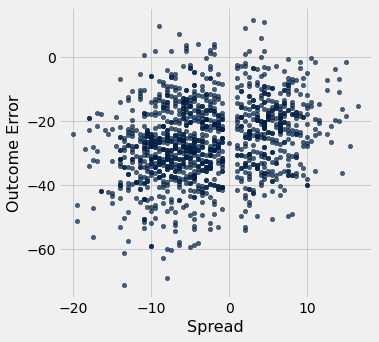

In [ ]:
outcome_errors = ...
...

In [ ]:
grader.check("q2_6")

여러분은 그 오류들이 거의 모두 음수라는 것을 알 수 있을 것입니다. 이는 우리의 직선이 데이터에 가장 적합하지 않다는 것을 의미합니다. 더 좋은 직선을 찾아보도록 합시다.

**Question 2.7.** `fit_line_by_rmse`이라는 함수를 정의합니다. 이 함수는 `spreads` (같은 열 이름과 의미를 갖는)라는 테이블을 인자로 받습니다. 그리고 그 테이블에 대해 스프레드로부터 결과를 예측하는 최소-제곱 회귀선의 기울기(첫번째 요소)와 절편(두번째 요소)를 포함하는 배열을 반환해야 합니다. **(3 points)**

*Hint*: 기울기와 절편을 인자로 사용하는 함수 `rmse`를 `fit_line_by_rmse` 내에서 정의합니다. `rmse`는 `fit_line_by_rmse`으로 전달되는 테이블을 사용하여 예측 결과를 계산하고, 예측 결과와 실제 결과의 평균 제곱 오차의 근(root mean squared error)을 반환합니다. `fit_line_by_rmse` 내에서 다른 함수를 호출하는 것과 같은 방식으로 `rmse`를 호출할 수 있습니다.

만약 아직 `minimize` [함수](http://data8.org/sp22/python-reference.html)를 사용해보지 않았다면, 지금이 연습해볼 수 있는 절호의 기회입니다. 여기에 [교재의 예제](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#numerical-optimization)가 있으니 참조하기 바랍니다.

<!--
BEGIN QUESTION
name: q2_7
manual: false
points:
 - 0
 - 0
 - 3
-->

In [ ]:
def fit_line_by_rmse(tbl):
    # Your code may need more than 1 line below here.
    def rmse(..., ...):
        return ... 
    return ... 
    
# Here is an example call to your function.  To test your function,
# figure out the right slope and intercept by hand.
example_table = Table().with_columns(
    "Spread", make_array(0, 1),
    "Outcome", make_array(1, 3))
fit_line_by_rmse(example_table)

In [ ]:
grader.check("q2_7")

**Question 2.8.** `fit_line_by_rmse`을 사용하여 임의의 직선이 `spreads`에 맞도록 하고, 그 결과를 `best_line`에 할당합니다. `best_line`의 첫번째와 두번째 요소를 각각 `best_line_slope`와 `best_line_intercept`에 할당합니다.

그런 다음, 새로운 직선으로 `errors`를 호출하여 발생하는 오차 배열을 `new_errors`에 저장합니다. 제공된 코드는 해당 잔차도(residual plot)와 최적 적합 선을 함께 표시합니다. **(3 points)**

*Hint:* 잔차도(residual plot)가 의미가 있는지를 확인합니다. 잔차도의 최적 적합선은 어떠한 특성을 가져야 할까요?

<!--
BEGIN QUESTION
name: q2_8
manual: false
points:
 - 0
 - 1
 - 1
 - 1
-->

In [ ]:
best_line = ...
best_line_slope = ...
best_line_intercept = ...

new_errors = ...

# This code displays the residual plot, given your values for the best_line_slope and best_line_intercept
Table().with_columns("Spread", 
                    spreads.column("Spread"), 
                    "Outcome errors", 
                    new_errors
                   ).scatter("Spread", "Outcome errors", fit_line=True)

# This just prints your slope and intercept
"Slope: {:g} | Intercept: {:g}".format(best_line_slope, best_line_intercept)

In [ ]:
grader.check("q2_8")

<!-- BEGIN QUESTION -->

**Question 2.9.** 위 **Question 2.8**에서 구한 기울기와 절편 쌍은 **Question 2.3**에서 구한 값과 매우 유사해야 합니다. RMSE를 최소화하여 이전 공식에서 동일한 기울기와 절편을 찾을 수 있었던 이유는 무엇입니까? **(3 points)**

<!--
BEGIN QUESTION
name: q2_9
manual: true
-->

_테이블의 첫번째 열과 두번째 열의 연관계수를 구하고, 각 열의 표준편차와 평균값을 이용한 공식에 의한 선형 회귀선은 예측의 오차에 대한 제곱의 평균값을 최소화하는 유일한 직선입니다. 따라서 임의의 회귀선에 대한 RMSE를 수치적으로 최소화하는 선형 회귀선과 그 결과는 매우 유사하게 됩니다._

## 회귀 추론(Regression Inference) 개론

이전에 이 수업에서는 예측치에 대한 불확실성을 정량화하기 위해 신뢰구간(confidence intervals)을 사용했습니다. 다음 절차에 따라 신뢰구간을 사용하여 가설 검정(hypothesis test)을 실행할 수도 있습니다:

1. 귀무가설(null hypothesis)과 대립가설(alternative hypothesis)을 정의합니다. (이들은 "파라미터는 X이다" 혹은 "파라미터는 X가 아니다"와 같은 형식이어야 합니다.)
2. p-값 컷오프를 선택하고 이를 $q$라고 합니다.
3. 부트스트랩 샘플링을 사용하여 $(100-q)\%$ 간격을 구성합니다. (예를 들어, 만약 여러분의 p-value 컷오프가 0.01 혹은 1%라면, 99%의 신뢰 구간을 구성합니다.)
4. 신뢰 구간을 사용하여 데이터가 귀무가설 혹은 대립가설과 더 일치하는지를 결정합니다.
   * 만약 귀무가설 파라미터 X가 신뢰구간 내에 있으면, 데이터가 귀무가설과 더 일치합니다.
   * 만약 귀무가설 파라미터 X가 신뢰구간에 있지 않으면, 데이터는 대립가설과 더 일치합니다.

최근에는 선형 회귀분석을 사용하여 상관 변수를 기반으로 예측하는 방법에 대해 논의했습니다. 예를 들어, 우리는 부모님의 키를 바탕으로 아이들의 키를 예측할 수 있습니다.

우리는 다음 기술을 이용하여 이 두가지 주체를 결합하여 인구에 대한 강력한 진술을 할 수 있습니다:
- 실제 기울기에 대한 부트스트랩 간격
- (특정 x값이 지정된 경우) y에 대한 부트스트랩 예측 간격

이번 숙제는 이러한 두가지 방법을 탐구합니다.


## The Data
[흰물떼새(Snowy Plover)](https://www.audubon.org/field-guide/bird/snowy-plover)는 캘리포니아와 다른 곳의 해안가에 사는 작은 새입니다. 너무 작아서 해변에 갈 때 그들이 밟고 있는 곳을 보지 않는 사람과 개를 포함한 많은 포식자들에게 취약합니다. 미국의 많은 지역에서 멸종 위기에 처한 것으로 여겨집니다.

이 자료는 흰물떼새의 알과 새로 부화한 병아리들에 관한 것입니다. 이 홈페이지에서 [알을 품은 어미새](http://cescos.fau.edu/jay/eps/articles/snowyplover.html)의 사진을 볼 수 있습니다.

이 데이터는 [버클리 대학의 전 학생](https://openlibrary.org/books/OL2038693M/BLSS_the_Berkeley_interactive_statistical_system)이 연구원으로써 포인트 레이스 국립 해안에서 수집했습니다.
그 목적은 계란의 크기로부터 부화 후 병아리의 무게를 예측하기 위한 것이었습니다. 갓 부화한 병아기라 클 수록 생존 가능성이 높습니다.

아래 테이블의 각 행은 한 개의 흰물떼새 알과 부화 후의 병아리에 대한 것입니다. 그 새가 얼마나 작은지를 주목하기 바랍니다:

- `Egg Length`와 `Egg Breadth`(가장 넓은 지름)은 밀리미터 단위로 측정됩니다.
- `Egg Weight`와 `Bird Weight`는 그램 단위로 측정됩니다.

In [ ]:
birds = Table.read_table('snowy_plover.csv')
birds

Egg Length,Egg Breadth,Egg Weight,Bird Weight
28.8,21.84,7.4,5.2
29.04,22.45,7.7,5.4
29.36,22.48,7.9,5.6
30.1,21.71,7.5,5.3
30.17,22.75,8.3,5.9
30.34,22.84,8.5,5.8
30.36,22.5,8.2,5.8
30.46,22.72,8.3,6
30.54,23.31,9,6.1
30.62,22.94,8.5,6.2


이 조사에서 우리는 새의 무게를 예측하기 위해 계란의 무게를 사용할 것입니다. 아래 셀을 실행하여 알의 무게와 새의 무게에 대한 산점도와 가장 적합한 선을 만듭니다.

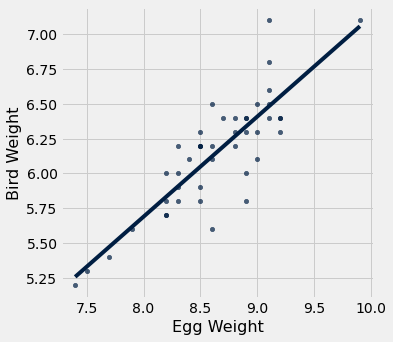

In [ ]:
# Just run this cell and examine the scatter plot.
birds.scatter('Egg Weight', "Bird Weight", fit_line=True)

## 3. Finding the Bootstrap Confidence Interval for the True Slope

표본의 산점도를 통해 우리는 알 무게와 새 무게 사이의 선형 관계를 관찰합니다. 하지만 표본에 나타나는 관계는 표본을 추출한 모집단에서는 존재하지 않을 수도 있습니다.

우리는 흰물떼새의 알 무게와 새 무게 사이에 정말로 선형 관계가 있는지 알고 싶습니다. 두 변수 사이에 선형관계가 없다면 0의 상관관계가 예상됩니다. 따라서 회귀선의 기울기도 0이 됩니다.


<!-- BEGIN QUESTION -->

**Question 3.1.** 알 무게와 새 무게 사이에 선형관계가 있는지 확인하기 위하여 신뢰구간을 사용하여 가설검정을 실행해 보겠습니다. 이 검정을 수행할 수 있는 귀무가설과 대립가설을 정의합니다. **(5 points)**

*Note:* **아래의 셀**에 다음의 형식으로 답을 작성합니다:
- **귀무가설:**
- **대안가설:**



<!--
BEGIN QUESTION
name: q1_1
manual: true
-->

_이 텍스트를 지우고 여러분의 답변을 작성하시오._

<!-- END QUESTION -->

앞서 **Question 1.1**과 **1.2**에서 정의한 다음의 두 함수를 사용할 것입니다.

1. `standard_units`: 이 함수는 숫자 배열을 가져와서 표준 단위로 변환된 숫자를 포함하는 배열을 반환합니다.
2. `correlation`: 이 함수는 테이블과 두 개의 열 이름(하나는 *x*, 다른 하나는 *y*)을 받아서 이들 열 사이의 상관관계를 반환합니다.

**Question 3.2.** 앞서 **Question 1.1**과 **1.2**에서 구현한 함수를 사용하여 `fit_line`이라는 함수를 만듭니다. 이는 `birds`와 같은 테이블과 *x*와 *y*와 관련된 열의 이름을 인수로 받아서 회귀선의 기울기와 절편을 순서대로 포함하고 있는 *배열*을 반환합니다. 이 회귀선은 *x*열을 사용하여 테이블의 *y*열을 예측합니다. **(5 points)**

<!--
BEGIN QUESTION
name: q3_2
manual: false
points:
 - 0
 - 0
 - 2
 - 6
-->

In [ ]:
def fit_line(tbl, x_col, y_col):
    ...

fit_line(birds, "Egg Weight", "Bird Weight")

In [ ]:
grader.check("q3_2")

`birds` 테이블에서 `fit_line`을 호출하여 생성된 선을 표시하기위해 다음 셀을 **실행**합니다.

**Note:** 아래 셀의 코드에 대해 여러분은 책임이 없지만, `fit_line` 함수가 데이터에 대한 합리적인 선을 생성했는지 확인하기 바랍니다.

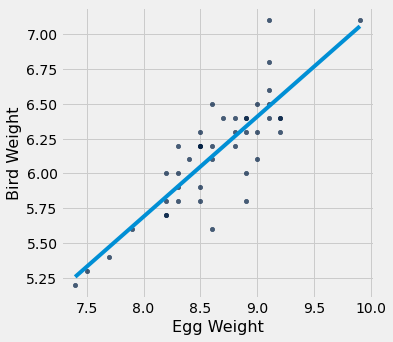

In [ ]:
# Ensure your fit_line function fits a reasonable line 
# to the data in birds, using the plot below.

# Just run this cell
slope, intercept = fit_line(birds, "Egg Weight", "Bird Weight")
birds.scatter("Egg Weight", "Bird Weight")
plt.plot([min(birds.column("Egg Weight")), max(birds.column("Egg Weight"))], 
         [slope*min(birds.column("Egg Weight"))+intercept, slope*max(birds.column("Egg Weight"))+intercept])
plt.show()

이제 우리는 알 무게와 새 무게 사이의 실제 관계에 대한 불확실성을 정량화하는 신뢰구간을 만드는데 필요한 모든 도구를 가지고 있습니다.


<!-- BEGIN QUESTION -->

**Question 3.3.** `birds`의 부트스트랩 재샘플 1,000개에 대한 가장 적합산 선의 기울기를 포함하는 `resampled_slopes`라는 배열을 만듭니다. 그리고 기울기의 분포를 출력합니다. **(5 points)**

<!--
BEGIN QUESTION
name: q3_3
manual: true
image: true
-->

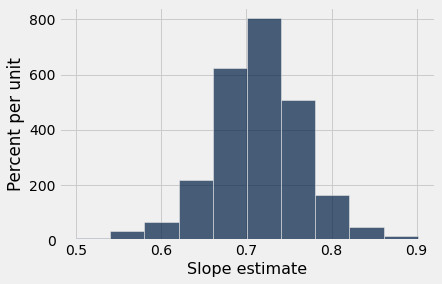

In [ ]:
resampled_slopes = ...

for i in np.arange(1000): 
    birds_bootstrap = ...
    bootstrap_line = ...
    bootstrap_slope = ...
    resampled_slopes = ...
    
# DO NOT CHANGE THIS LINE
Table().with_column("Slope estimate", resampled_slopes).hist()

In [ ]:
grader.check("q3_3")

<!-- END QUESTION -->

**Question 3.4.** 재샘플된 기울기를 사용하여 기울기의 참 값에 대한 95% 신뢰구간을 구성할 수 있습니다. **(5 points)**

<!--
BEGIN QUESTION
name: q3_4
manual: false
points:
 - 0
 - 0
 - 8
-->

In [ ]:
lower_end = ...
upper_end = ...
print("95% confidence interval for slope: [{:g}, {:g}]".format(lower_end, upper_end))

In [ ]:
grader.check("q3_4")

<!-- BEGIN QUESTION -->

**Question 3.5.** 여러분이 구한 신뢰구간을 기준으로 기울기 참값이 0이라는 귀무가설을 승인하거나 기각하겠습니까? 그 이유는 무엇입니까? 어떤 p-값 컷오프를 사용하고 있습니까? **(5 points)**

<!--
BEGIN QUESTION
name: q3_5
manual: true
-->

_95% 신뢰구간 내에 0이 포함되지 않으므로 실제 기울기가 0이라는 귀무가설은 기각합니다. p-값 컷오프는 0.05입니다._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.6.** 여러분은 실제 기울기가 무엇이라고 생각하나요? 정확한 숫자는 필요하지 않습니다. 여러분은 이 추정에 대하여 얼마나 확신하나요? **(5 points)**

*Hint:* 실제 기울기가 속한다고 생각하는 구간을 제공할 수 있습니까?

<!--
BEGIN QUESTION
name: q3_6
manual: true
-->

_이 텍스트를 지우고 여러분의 답변을 작성하시오._

<!-- END QUESTION -->



## 4. Finding the Bootstrap Prediction Interval

우리는 포인트 레예스(Point Reyes)에 방문하여 우연히 흰물새떼 알을 발견하였다고 가정해봅시다; 우리는 알이 부화하면 얼마나 무거울지 알고 싶습니다. 즉, 회기선을 이용하여 해당 알의 무게를 기반으로 새의 무게를 예측하려고 합니다.

하지만, 실제 회귀선의 기울기가 불확실한 것처럼 실제 회귀선을 기반으로 한 예측도 불확실합니다.

**Question 4.1.** `fitted_value` 함수를 정의합니다.  다음과 같은 네 가지 인수를 사용해야 합니다:

1. `table`: `birds`와 같은 테이블. 첫번째 열을 사용하여 두번째 열의 값을 예측할 것입니다.
2. `x_col`: 입력 `table` 내의 x-열의 이름
3. `y_col`: 입력 `table` 내의 y-열의 이름
4. `given_x`: 예측하고자 하는 예측 변수의 값

함수는 주어진 x에 대한 선에 의한 예측을 반환해야 합니다. **(5 points)**

*Hint:* **Question 3.2**에서 정의한 `fit_line` 함수를 사용하기바랍니다.

<!--
BEGIN QUESTION
name: q4_1
manual: false
points:
 - 0
 - 8
-->

In [ ]:
def fitted_value(table, x_col, y_col, given_x):
    line = ...
    slope = ...
    intercept = ...
    ...

# Here's an example of how fitted_value is used. The code below
# computes the prediction for the bird weight, in grams, based on
# an egg weight of 8 grams.
egg_weight_eight = fitted_value(birds, "Egg Weight", "Bird Weight", 8)
egg_weight_eight

In [ ]:
grader.check("q4_1")

**Question 4.2.** 포인트 레예즈의 거주자로 흰물떼새의 전문가인 레이몬드는 주의깊게 관찰해 온 알의 무게가 9그램이라고 이야기하였습니다. 위의 `fitted_value`를 사용하여 변수 `experts_egg`를 레이몬드의 알에 대한 예측된 새의 무게에 할당합니다. **(5 points)**

<!--
BEGIN QUESTION
name: q4_2
manual: false
points:
 - 0
 - 8
-->

In [ ]:
experts_egg = ...
experts_egg

In [ ]:
grader.check("q4_2")

In [ ]:
# Let's look at the number of rows in the birds table.
birds.num_rows

44

동료 공원가는 여러분의 예측에 대해 다음과 같이 이의를 제기합니다: 

> "여러분의 예측은 44마리의 표본에 달려 있습니다. 44마리의 다른 샘플을 고려한다면 여러분의 예측은 바뀌지 않을까요?"

교재의 [16.3](https://inferentialthinking.com/chapters/16/3/Prediction_Intervals.html)절을 읽으면 바로 답변을 알 수 있습니다. 표본이 다르면 회귀선도 달라졌을 것입니다. 이것은 궁극적으로 다른 예측을 초래할 것입니다. 우리의 예측이 얼마나 좋은지를 알기 위해서는 예측이 얼마나 가변적일 수 있는지를 파악해야 합니다.

**Question 4.3.** `compute_resampled_line` 함수를 정의합니다. 이 함수는 테이블 `tbl`과 두 개의 열의 이름을 인자로 받습니다. 그리고 테이블에서 하나의 부트스트랩 재샘플에 대해 최적 적합선의 파라미터(기울기와 절편)을 포함하는 배열을 반환합니다. **(5 points)**

<!--
BEGIN QUESTION
name: q4_3
manual: false
points:
 - 0
 - 8
-->

In [ ]:
def compute_resampled_line(tbl, x_col, y_col):
    resample = ...
    resampled_line = ...
    ...

In [ ]:
grader.check("q4_3")

아래 셀을 **실행**하여 `bootstrap_lines` 함수를 정의합니다. 다음의 네 개의 인수를 사용합니다:
1. `tbl`: `birds`와 같은 테이블
2. `x_col`: 입력 `tbl` 내의 x-열의 이름
3. `y_col`: 입력 `tbl` 내의 y-열의 이름
4. `num_bootstraps`: 실행할 부트스트랩의 회수를 나타내는 정수

각 부트스트랩 재샘플에 대해 하나의 행과 다음 두개의 열이 있는 *테이블*을 반환합니다:
1. `Slope`: 부트스트랩의 기울기 
2. `Intercept`: 해당 부트스트랩의 절편

In [ ]:
# Just run this cell
def bootstrap_lines(tbl, x_col, y_col, num_bootstraps):
    resampled_slopes = make_array()
    resampled_intercepts = make_array() 
    for i in np.arange(num_bootstraps): 
        resampled_line = compute_resampled_line(tbl, x_col, y_col) 
        resampled_slope = resampled_line.item(0) 
        resampled_intercept = resampled_line.item(1) 
        resampled_slopes = np.append(resampled_slopes,resampled_slope)
        resampled_intercepts = np.append(resampled_intercepts,resampled_intercept)
    tbl_lines = Table().with_columns('Slope', resampled_slopes, 'Intercept', resampled_intercepts)
    return tbl_lines

regression_lines = bootstrap_lines(birds, "Egg Weight", "Bird Weight", 1000)
regression_lines

Slope,Intercept
0.760212,-0.427479
0.778043,-0.558636
0.687027,0.228647
0.720232,-0.0830916
0.609637,0.848763
0.592181,0.992376
0.749856,-0.333413
0.724594,-0.134245
0.719985,-0.0496001
0.778509,-0.546734


<!-- BEGIN QUESTION -->

**Question 4.4.** `regression_lines`의 각 회귀선에 대해 무게 8그램의 알을 기준으로 예측된 새의 무게를 포함하는 배열 `predictions_for_eight`을 만듭니다. **(5 points)**

<!--
BEGIN QUESTION
name: q4_4
manual: true
image: true
-->

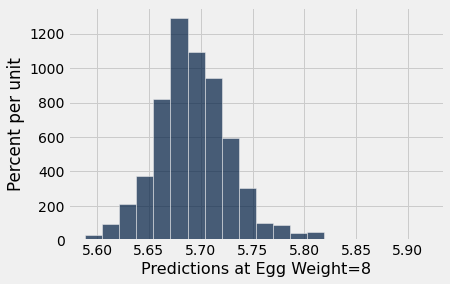

In [ ]:
predictions_for_eight = ...

# This will make a histogram of your predictions:
table_of_predictions = Table().with_column('Predictions at Egg Weight=8', predictions_for_eight)
table_of_predictions.hist('Predictions at Egg Weight=8', bins=20)

In [ ]:
grader.check("q4_4")

All tests passed!

<!-- END QUESTION -->

**Question 4.5.** 이러한 예측에 대해 약 95% 신뢰구간을 생성합니다. **(4 points)**

<!--
BEGIN QUESTION
name: q4_5
manual: false
points:
 - 0
 - 0
 - 6
-->

In [ ]:
lower_bound = ...
upper_bound = ...

print('95% Confidence interval for predictions for x=8: (', lower_bound,",", upper_bound, ')')

In [ ]:
grader.check("q4_5")

**Question 4.6.** `plover_statements`을 해당 문장이 참인 문장의 번호들 만으로 이루어진 정수 배열로 설정합니다. **(4 points)**

1. 95% 신뢰구간은 `birds`에서 무게 8그램이었던 알의 새 무게의 95%를 커버합니다.

2. 95% 신뢰구간을 통해 실제 무게와 예측이 얼마나 다른지를 알 수 있습니다.

3. 95% 신뢰구간은 실제 선에 의해 예측된 추정치의 불확실성을 정량화합니다.

<!--
BEGIN QUESTION
name: q4_6
manual: false
points:
 - 0
 - 3
 - 3
-->

In [ ]:
plover_statements = ...

In [ ]:
grader.check("q4_6")

숙제 08이 완성되었습니다.!

**중요한 숙제 제출 단계:**
1. 테스트를 실행하고 모두 통과했는지 확인합니다.
2. **File** 메뉴에서 **Save and pin revision**을 선택한 다음 **마지막 셀을 실행**합니다.
3. 링크를 클릭하여 zip 파일을 다운로드합니다.
4. LMS를 통해 숙제를 제출합니다. 만약 여러번 제출할 경우에는 마지막으로 제출된 것만을 고려할 것입니다.


---

다시한번 체크하기 위해서 아래의 셀을 통해 자동채점 테스트를 모두 한번 더 실행합니다.

In [ ]:
grader.check_all()

## Submission

아래 셀을 실행하기 전에 노트북의 모든 셀을 순서대로 실행했는지 확인하여 모든 이미지/그래프가 출력에 나타나도록 하십시오. 아래 셀은 제출할 zip 파일을 생성합니다. **내보내기 전에 저장하십시오!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)

구글 코랩에서 grader 현재 버전은 위의 zip 파일 링크가 작동되지 않고, 현재 디렉토리(구글 드라이브의 .../hw/hw08/) 내에 hw08.zip으로 저장되어 있습니다. 따라서 해당 zip 파일을 LMS에 제출하면 됩니다. 